In [32]:
import pandas as pd
import numpy as np
import os

In [33]:
# Load csv
df = pd.read_csv('../../data/metadata.csv')

# Get segmented images
segmented = os.listdir('../../data/segmented')
segmented = [x for x in segmented if "mask" not in x]

# Get not segmented images
not_segmented = os.listdir('../../data/not_segmented')

In [34]:
def segmented_distribution():
    categories = {
        'BCC': [],
        'MEL': [],
        'SEK': [],
        'SCC': [],
        'ACK': [],
        'NEV': [],
    }

    for file in segmented:
        category = df.loc[df['img_id'] == file]['diagnostic'].values[0]
        categories[category].append(file)

    return categories

def not_segmented_distribution():
    categories = {
        'BCC': [],
        'MEL': [],
        'SEK': [],
        'SCC': [],
        'ACK': [],
        'NEV': [],
    }

    for file in not_segmented:
        category = df.loc[df['img_id'] == file]['diagnostic'].values[0]
        categories[category].append(file)

    return categories

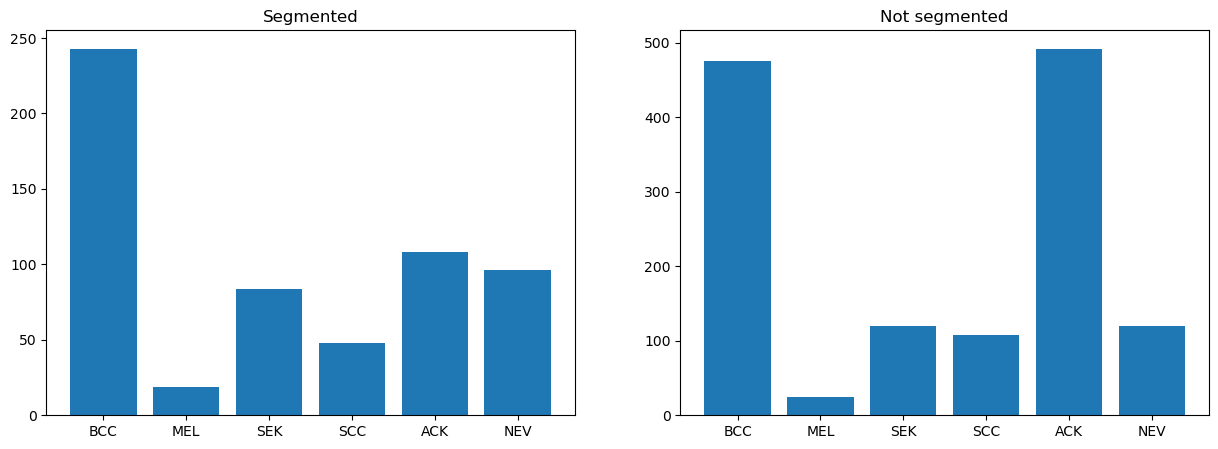

In [44]:
import matplotlib.pyplot as plt

segmented_dict_or = segmented_distribution()
not_segmented_dict_or = not_segmented_distribution()
segmented_dict = { k: len(v) for k, v in segmented_dict_or.items() }
not_segmented_dict = { k: len(v) for k, v in not_segmented_dict_or.items() }

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# Plot them on the same scale
ax[0].bar(segmented_dict.keys(), segmented_dict.values())
ax[1].bar(not_segmented_dict.keys(), not_segmented_dict.values())

ax[0].set_title('Segmented')
ax[1].set_title('Not segmented')

plt.show()

In [41]:
print(segmented_dict)
print(not_segmented_dict)

{'BCC': 243, 'MEL': 19, 'SEK': 84, 'SCC': 48, 'ACK': 108, 'NEV': 96}
{'BCC': 476, 'MEL': 25, 'SEK': 120, 'SCC': 108, 'ACK': 492, 'NEV': 120}


In [52]:
# Move all MEL images to MELLER folder
mels = not_segmented_dict_or['MEL']

for mel in mels:
    os.rename(f'../../data/not_segmented/{mel}', f'../../data/MELLER/{mel}')